In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
np.array([1,2,3])

array([1, 2, 3])

In [3]:
data = pd.read_csv('dataset/Boston Housing.csv', encoding = "ISO-8859-1")

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
#Normalization - MinMaxScaler

def normal(x:list):
    maxi = max(x)
    mini = min(x)
    avg = np.mean(x)
    new = [(i-avg)/(maxi-mini) for i in x ]
    
    return new

In [6]:
df = data.copy()

df = df.apply(normal, axis=0)

df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.040544,0.066364,-0.323562,-0.06917,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729,0.032604
1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939,-0.020729
2,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.172517,-0.076981,0.106581,-0.328235,-0.317246,-0.069738,0.091169,-0.237943,0.270382
3,-0.040251,-0.113636,-0.328328,-0.06917,-0.198961,0.136686,-0.234551,0.206163,-0.284757,-0.355414,0.026007,0.095708,-0.268021,0.241493
4,-0.039839,-0.113636,-0.328328,-0.06917,-0.198961,0.165236,-0.148042,0.206163,-0.284757,-0.355414,0.026007,0.101432,-0.202071,0.303715


In [7]:
# Features

X = df[['RM', 'AGE']]
X.insert(0, 'X0', 1)
X.head()

,X0,RM,AGE
0,1,0.055636,-0.034757
1,1,0.026129,0.106335
2,1,0.172517,-0.076981
3,1,0.136686,-0.234551
4,1,0.165236,-0.148042


In [8]:
# Numpy array format for matrix computation

y = df.MEDV.values
X = X.values

In [9]:
# Sample size

m = len(df.index)
m

506

In [10]:
# Randomly initiate 3 coefficients: theta

theta0 = 1
theta1 = 2
theta2 = 3

theta = np.array([theta0, theta1, theta2])

theta

array([1, 2, 3])

In [22]:
# Hypothesis

hypo = X@theta

In [12]:
# Cost function

def cost(t, X=X, y=y, m=m):
    cost = np.transpose((X@t - y))@(X@t - y)
    cost = (1/(2*m))*cost
    return cost

In [13]:
cost(t=theta)

0.9069807480290534

In [14]:
# Slope of cost function 

def cost_dev(t, X=X, y=y, m=m):
    dev = np.transpose(X)@(X@t - y)
    dev = (1/m)*dev
    return np.array(dev)

In [15]:
cost_dev(t=theta)

array([ 1.        , -0.01099331,  0.25519318])

In [16]:
# Assign a learning rate

a = 0.0005

In [17]:
# Update the coefficients

%%time 

cost_list = []

for i in range(1000000):
    
    theta = theta - a*cost_dev(t=theta)      
    
    cost_val = cost(theta)
    cost_list.append(cost_val)

CPU times: user 21.9 s, sys: 277 ms, total: 22.1 s
Wall time: 22.5 s


Text(0.5,1,'MSE Trend over Iterations')

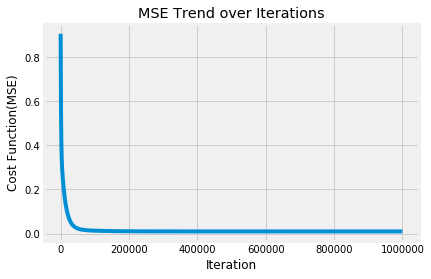

In [18]:
plt.plot(np.arange(0, 1000000),cost_list)
plt.xlabel('Iteration'); plt.ylabel('Cost Function(MSE)'); plt.title('MSE Trend over Iterations')

In [19]:
cost_val

0.009791096084743538

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
coef = pd.DataFrame(theta)
coef['LinearRegression()']= lr.coef_
coef ['LinearRegression()'][0] = lr.intercept_
coef = coef.rename(columns = {0: 'Gradient Descent'})
coef.index = pd.Index(['Intercept', 'theta1', 'theta2'])
coef

,Gradient Descent,LinearRegression()
Intercept,1.029105e-15,1.032823e-15
theta1,9.747228e-01,9.743967e-01
theta2,-1.569906e-01,-1.570361e-01
